In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('../Teacher Ferdin/fishdata.csv', encoding = 'unicode_escape',header = None)
column_names = ['Year','Month','Day','Hour','Minute','Second','Carbon_Monoxide','PM_2.5','External_Temperature','Humidity','Internal_Temperature','Ignore']
df.columns = column_names
df.drop(index = df.index[0], inplace = True)
df.head()

C:\Users\Asus\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Year,Month,Day,Hour,Minute,Second,Carbon_Monoxide,PM_2.5,External_Temperature,Humidity,Internal_Temperature,Ignore
1,2020.0,6.0,18,14,30.0,43.0,201,25.0,29.0,95.0,27.19,4.39
2,2020.0,6.0,18,14,30.0,48.0,201,25.0,29.0,95.0,27.19,4.38
3,2020.0,6.0,18,14,31.0,3.0,201,25.0,29.0,95.0,27.19,4.38
4,2020.0,6.0,18,14,31.0,8.0,201,25.0,29.0,95.0,27.19,4.41
5,2020.0,6.0,18,14,31.0,13.0,201,25.0,29.0,95.0,27.25,4.41


In [21]:
df.describe()

,Year,Month,Day,Hour,Minute,Second,PM_2.5,External_Temperature,Humidity,Internal_Temperature,Ignore
count,8.119460e+05,8.119460e+05,811946.000000,811946.000000,811946.000000,811946.000000,811872.000000,811851.000000,811843.000000,811843.000000,807408.000000
mean,2.037879e+03,2.617098e+00,18.485033,11.785307,29.477050,29.496661,-65.001062,30.827049,94.627387,28.486738,82.744870
std,7.186175e+03,2.519275e+03,26.612144,6.223211,17.316265,17.320485,66.953825,5.682789,5.387394,2.600313,1640.327088
min,1.950000e+02,-1.912020e+06,1.000000,0.000000,0.000000,0.000000,-240.000000,-999.000000,-999.000000,2.970000,2.650000
25%,2.020000e+03,7.000000e+00,13.000000,7.000000,14.000000,14.000000,-140.000000,29.000000,95.000000,27.060000,3.850000
50%,2.020000e+03,7.000000e+00,21.000000,12.000000,29.000000,29.000000,-50.000000,30.000000,95.000000,28.250000,4.020000
75%,2.020000e+03,8.000000e+00,26.000000,16.000000,44.000000,45.000000,-19.000000,32.000000,95.000000,30.250000,4.350000
max,3.212020e+06,2.020000e+03,22020.000000,95.000000,59.000000,59.000000,322.000000,310.000000,95.000000,95.000000,42020.000000


In [22]:
df.dtypes

Year                    float64
Month                   float64
Day                       int64
Hour                      int64
Minute                  float64
Second                  float64
Carbon_Monoxide          object
PM_2.5                  float64
External_Temperature    float64
Humidity                float64
Internal_Temperature    float64
Ignore                  float64
dtype: object

In [23]:
df1 = df.astype({'Year':'int64',
                'Month': 'int64',
                'Minute':'int64',
                'Second':'int64'})
df['Carbon_Monoxide'] = df['Carbon_Monoxide'].apply(pd.to_numeric, errors='coerce')
df1.dtypes

Year                      int64
Month                     int64
Day                       int64
Hour                      int64
Minute                    int64
Second                    int64
Carbon_Monoxide          object
PM_2.5                  float64
External_Temperature    float64
Humidity                float64
Internal_Temperature    float64
Ignore                  float64
dtype: object

In [24]:
#removing irregular months
df = df[df['Month'] > 0]
df = df[df['Month'] < 12]

#removing irregular years
df = df[df['Year'] <= 2021]
df = df[df['Year'] > 2000]

#removing irregular external temperature
df = df[df['External_Temperature'] > 0]

In [25]:
df.describe()

,Year,Month,Day,Hour,Minute,Second,Carbon_Monoxide,PM_2.5,External_Temperature,Humidity,Internal_Temperature,Ignore
count,811790.0,811790.000000,811790.000000,811790.000000,811790.000000,811790.000000,810108.000000,811790.000000,811790.000000,811782.000000,811782.000000,807347.000000
mean,2020.0,7.332892,18.445477,11.779964,29.477845,29.498565,212.709345,-65.016607,30.833565,94.635011,28.484172,82.749165
std,0.0,1.084936,9.346040,6.188681,17.316778,17.319966,52.203991,66.921293,5.223432,4.926502,2.567703,1640.388966
min,2020.0,6.000000,1.000000,0.000000,0.000000,0.000000,-183.000000,-240.000000,4.250000,25.440000,2.970000,2.650000
25%,2020.0,7.000000,13.000000,7.000000,14.000000,15.000000,183.000000,-140.000000,29.000000,95.000000,27.060000,3.850000
50%,2020.0,7.000000,21.000000,12.000000,29.000000,29.000000,198.000000,-50.000000,30.000000,95.000000,28.250000,4.020000
75%,2020.0,8.000000,26.000000,16.000000,44.000000,45.000000,244.000000,-19.000000,32.000000,95.000000,30.250000,4.350000
max,2020.0,10.000000,31.000000,23.000000,59.000000,59.000000,334.000000,77.000000,95.000000,95.000000,32.440000,42020.000000


In [28]:
df.isnull().sum()

Year                       0
Month                      0
Day                        0
Hour                       0
Minute                     0
Second                     0
Carbon_Monoxide         1682
PM_2.5                     0
External_Temperature       0
Humidity                   8
Internal_Temperature       8
Ignore                  4443
dtype: int64

In [30]:
df = df.dropna()

In [31]:
df.isnull().sum()

Year                    0
Month                   0
Day                     0
Hour                    0
Minute                  0
Second                  0
Carbon_Monoxide         0
PM_2.5                  0
External_Temperature    0
Humidity                0
Internal_Temperature    0
Ignore                  0
dtype: int64

In [32]:
test_df = df.head(10000)

In [ ]:
from sklearn.cluster import MeanShift

model = MeanShift(bandwidth=10)
model.fit(df)
pred = model.fit_predict(test_df)

plt.figure(figsize=(10,6))
plt.scatter(test_df['External_Temperature'], test_df['Humidity'], c=pred, cmap='plasma', alpha=0.9)
plt.show()

# 3D scatter

Text(0.5, 0.92, '3D_Scatter')

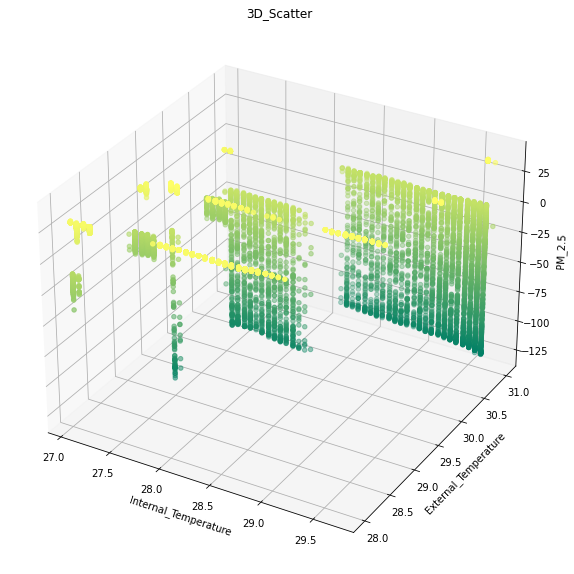

In [35]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

xdata = test_df['Internal_Temperature']
ydata = test_df['External_Temperature']
zdata = test_df['PM_2.5']

ax.scatter(xdata, ydata, zdata, c=zdata, cmap='summer')
ax.set_xlabel('Internal_Temperature')
ax.set_ylabel('External_Temperature')
ax.set_zlabel('PM_2.5')
ax.set_title('3D_Scatter')

# 3D Contour

In [39]:
Z = test_df.pivot_table(index='Internal_Temperature', columns='External_Temperature', values='PM_2.5').T.values
Z

array([[-13.37634409,  23.37944664,  30.77852349,  29.38743455,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,  32.        ,  32.72972973,  32.86363636,
         32.94642857,  33.        ,  32.97727273,  32.94444444,
         33.        ,  32.9       ,  32.65217391,  32.18181818,
         32.33333333,  32.13636364,  32.15384615,  32.69444444,
         33.14705882,  33.75757576,  34.        ,  34.        ,
         34.        ,  34.        ,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan],
       [-21.66666667, -19.10824742, -12.8627451 ,  10.84382872,
        -19.66666667,          nan,          nan,  -7.72857143,
         20.06930693,          nan,          nan,          nan,
                 nan,  32.75      ,  32.77826087,  32.93006993,
         32.98591549,  32.97142857,  33.        ,  32

Text(0.5, 0.92, 'Contour3D')

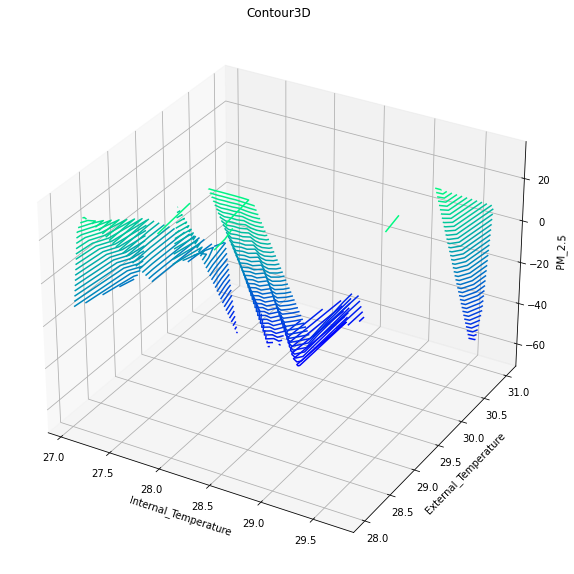

In [42]:
X_unique = np.sort(test_df['Internal_Temperature'].unique())
Y_unique = np.sort(test_df['External_Temperature'].unique())
X, Y = np.meshgrid(X_unique, Y_unique)

fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
ax.contour(X, Y, Z, 50, cmap='winter')
ax.set_xlabel('Internal_Temperature')
ax.set_ylabel('External_Temperature')
ax.set_zlabel('PM_2.5')
ax.set_title('Contour3D')